In [1]:
import pandas as pd

#https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
stroke_df = pd.read_csv('C:\Git\PythonDash\dataset\stroke_prediction\healthcare-dataset-stroke-data.csv')

len(stroke_df)

5110

In [2]:
stroke_df.info()
#bmiにnullあり

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# カラム
1) id: 一意の識別子  
2) 性別: 「男性」、「女性」または「その他」  
3) 年齢: 患者の年齢  
4) 高血圧: 患者が高血圧でない場合は 0、患者が高血圧の場合は 1   
5) 心臓病: 患者が心臓病でない場合は 0、患者が心臓病の場合は 1  
6) 既婚: 「いいえ」または「はい」  
7) 就労形態: 「子供」、「公務員」、「働いたことがない」、「民間」または「自営業」  
8) 居住形態: 「田舎」または「都会」  
9) 平均血糖値: 血中の平均血糖値  
10) BMI: ボディマス指数  
11) 喫煙状況: 「以前喫煙していた」、「喫煙したことがない」、「喫煙している」または「不明」*  
12) 脳卒中: 患者が脳卒中を起こした場合は 1脳卒中またはそうでない場合は0  
*注: smoking_statusの「不明」は、この患者に関する情報が利用できないことを意味します  

In [3]:
stroke_df.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [4]:
#Unknownが多いからそのまま使用する（不明な背景によってはstrokeに影響があると考える）
stroke_df['smoking_status'].unique()
stroke_df['smoking_status'].value_counts()


never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [5]:
#nullが多いからそのまま使用する
stroke_df['bmi'].isnull().sum()

201

(array([  5.,  32., 124., 250., 331., 423., 581., 629., 614., 504., 400.,
        291., 206., 164., 117.,  88.,  37.,  30.,  21.,  17.,  22.,   9.,
          2.,   4.,   3.,   1.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   1.]),
 array([10.3   , 12.4825, 14.665 , 16.8475, 19.03  , 21.2125, 23.395 ,
        25.5775, 27.76  , 29.9425, 32.125 , 34.3075, 36.49  , 38.6725,
        40.855 , 43.0375, 45.22  , 47.4025, 49.585 , 51.7675, 53.95  ,
        56.1325, 58.315 , 60.4975, 62.68  , 64.8625, 67.045 , 69.2275,
        71.41  , 73.5925, 75.775 , 77.9575, 80.14  , 82.3225, 84.505 ,
        86.6875, 88.87  , 91.0525, 93.235 , 95.4175, 97.6   ]),
 <BarContainer object of 40 artists>)

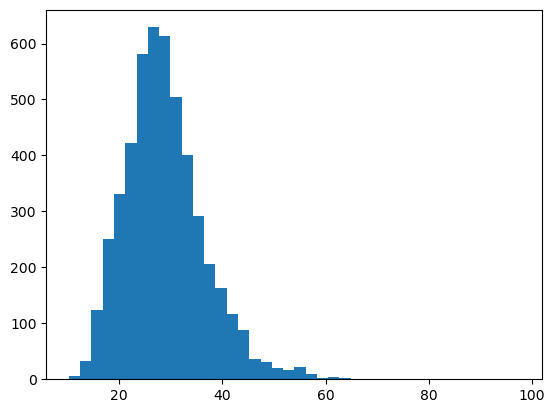

In [6]:
# null対処
import matplotlib.pyplot as plt 

plt.hist(stroke_df['bmi'], bins=40)

In [7]:
#外れ値の可能性あり
stroke_df['bmi'].max()

97.6

In [8]:

def remove_outliers(df, columns):
    """
    各数値列の IQR メソッドを使用して、DataFrame から外れ値を削除

    Parameters:
    df (pd.DataFrame): 外れ値を除去する前のDataFrame
    columns:外れ値を除去したいカラム
    Returns:
    pd.DataFrame: 外れ値を除去したDataFrame
    """
    df_clean = df.copy()

    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
        print(col)
    return df_clean

In [9]:
columns_to_clean = ['bmi']
df_cleaned = remove_outliers(stroke_df, columns_to_clean)

bmi


In [10]:
stroke_df['bmi'].sort_values(ascending=False)

2128    97.6
4209    92.0
928     78.0
544     71.9
1559    66.8
        ... 
5039     NaN
5048     NaN
5093     NaN
5099     NaN
5105     NaN
Name: bmi, Length: 5110, dtype: float64

In [11]:
stroke_df.select_dtypes(include=['int', 'float']).columns
columns_num = ['age', 'avg_glucose_level','bmi' ]


C:\Users\nishi\anaconda2023\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


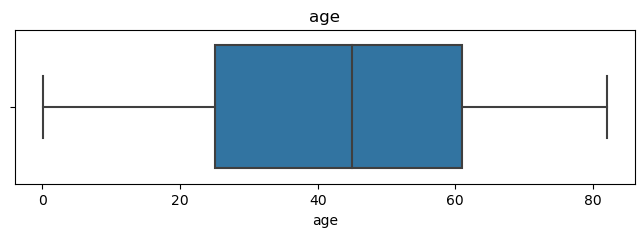

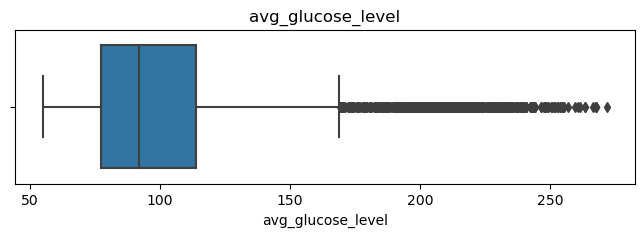

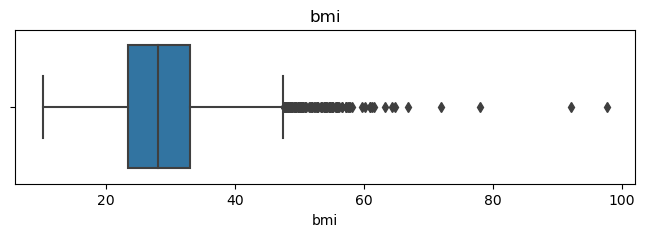

In [12]:
import seaborn as sns

# 数値カラムに対してボックスプロットを作成
for column in columns_num:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=stroke_df[column])
    plt.title(f'{column}')
    plt.show()
    
#print(len(stroke_df))
#print(len(df_cleaned))

#print(stroke_df['bmi'].max())
#print(df_cleaned['bmi'].max())

# 目的を明確化するためbmi40未満にデータを設定する

18.5未満：低体重   
18.5〜24.9：標準体重  
25〜29.9：過体重   
30以上：肥満  
40以上：高度肥満  

In [13]:
# nullは残すがbmi40以上は削除
bmi_restricted = stroke_df[(stroke_df['bmi'] < 40) | (stroke_df['bmi'].isnull())]
print(len(bmi_restricted))
print(len(stroke_df))
print(len(bmi_restricted)/len(stroke_df))

4696
5110
0.9189823874755382


27.3
27.33566184649615


(array([  1.,   2.,   2.,   3.,   8.,  21.,  26.,  47.,  58.,  91.,  78.,
         85.,  98., 131., 112., 148., 151., 194., 173., 178., 199., 200.,
        244., 204., 217., 216., 175., 182., 158., 158., 156., 110., 137.,
         85., 101.,  89.,  68.,  68.,  60.,  61.]),
 array([10.3 , 11.04, 11.78, 12.52, 13.26, 14.  , 14.74, 15.48, 16.22,
        16.96, 17.7 , 18.44, 19.18, 19.92, 20.66, 21.4 , 22.14, 22.88,
        23.62, 24.36, 25.1 , 25.84, 26.58, 27.32, 28.06, 28.8 , 29.54,
        30.28, 31.02, 31.76, 32.5 , 33.24, 33.98, 34.72, 35.46, 36.2 ,
        36.94, 37.68, 38.42, 39.16, 39.9 ]),
 <BarContainer object of 40 artists>)

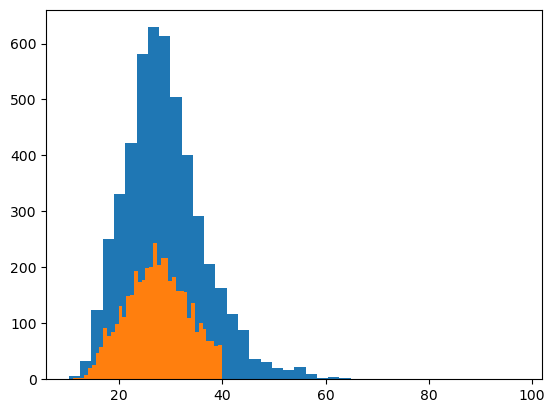

In [14]:
print(bmi_restricted['bmi'].median())
print(bmi_restricted['bmi'].mean())

import matplotlib.pyplot as plt 
plt.hist(stroke_df['bmi'], bins=40)
plt.hist(bmi_restricted['bmi'], bins=40)

In [15]:
#bmiがnullの場合、bmi_null = 1 / nullは中央値で保管
bmi_restricted['bmi_null'] = bmi_restricted['bmi'].isnull().astype(int)
bmi_restricted['bmi'] = bmi_restricted['bmi'].fillna(bmi_restricted['bmi'].mean())

C:\Users\nishi\AppData\Local\Temp\ipykernel_11644\2792848914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmi_restricted['bmi_null'] = bmi_restricted['bmi'].isnull().astype(int)
C:\Users\nishi\AppData\Local\Temp\ipykernel_11644\2792848914.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmi_restricted['bmi'] = bmi_restricted['bmi'].fillna(bmi_restricted['bmi'].mean())


In [16]:
#bmi_restricted[bmi_restricted['bmi'].isnull()]
bmi_restricted['bmi'].isnull().sum()

0


# 平均血糖値 (mg/dL)：HbA1c (%)
100:5.0  
126:6.0  
154:7.0  
183:8.0  
212:9.0  
240:10.0  
269:11.0  
298:12.0  

In [17]:
# avg_glucose_levelは外れ値がないとみなす
bmi_restricted['avg_glucose_level'].sort_values(ascending = False)

193     271.74
1207    267.76
3088    267.61
4983    267.60
2462    266.59
         ...  
772      55.26
682      55.25
4110     55.23
1191     55.22
4886     55.12
Name: avg_glucose_level, Length: 4696, dtype: float64

In [18]:
#カテゴリかる変数の処理
dummied = pd.get_dummies(bmi_restricted, columns=['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status' ], drop_first=True)

# カテゴリかる変数の可視化

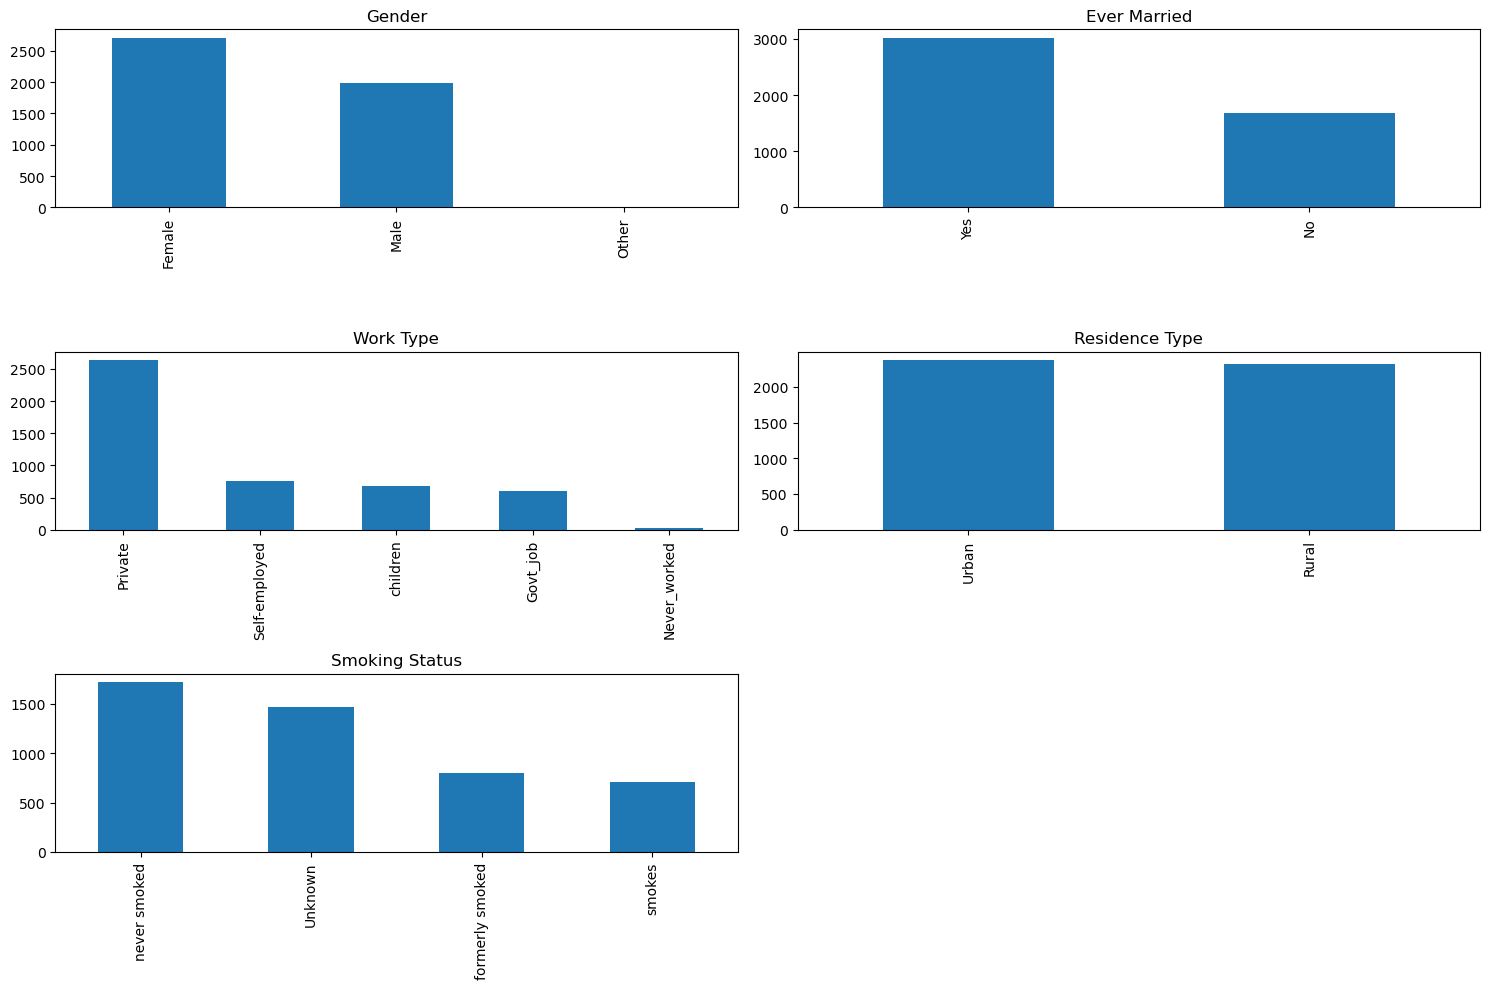

In [19]:
#カテゴリカル変数
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

# 各カテゴリカル変数の棒グラフの作成
bmi_restricted['gender'].value_counts().plot(kind='bar', ax=axes[0, 0], title='Gender')
bmi_restricted['ever_married'].value_counts().plot(kind='bar', ax=axes[0, 1], title='Ever Married')
bmi_restricted['work_type'].value_counts().plot(kind='bar', ax=axes[1, 0], title='Work Type')
bmi_restricted['Residence_type'].value_counts().plot(kind='bar', ax=axes[1, 1], title='Residence Type')
bmi_restricted['smoking_status'].value_counts().plot(kind='bar', ax=axes[2, 0], title='Smoking Status')

fig.delaxes(axes[2, 1])
plt.tight_layout()
plt.show()

In [20]:
bmi_restricted.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
bmi_null             0
dtype: int64

In [21]:
dummied

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,bmi_null,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,0,1,0,1,0,1,0,0,1,1,0,0
1,51676,61.0,0,0,202.21,27.335662,1,1,0,0,1,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,0,1,0,1,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,0,0,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,0,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,13.0,0,0,103.08,18.600000,0,0,0,0,0,0,0,0,1,0,0,0,0
5105,18234,80.0,1,0,83.75,27.335662,0,1,0,0,1,0,1,0,0,1,0,1,0
5107,19723,35.0,0,0,82.99,30.600000,0,0,0,0,1,0,0,1,0,0,0,1,0
5108,37544,51.0,0,0,166.29,25.600000,0,0,1,0,1,0,1,0,0,0,1,0,0


In [31]:
X = dummied.drop(columns=['stroke', 'id'])
y = dummied['stroke']

from sklearn.model_selection  import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state = 0)

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=33)
rf_model.fit(X_train_, y_train_)


RandomForestClassifier(random_state=33)

In [35]:
rf_score = rf_model.score(X_test_, y_test_)

In [36]:
rf_score

0.9446808510638298

In [37]:
# X_train.head()

In [38]:
from xgboost import XGBClassifier

# XGBoostモデルの作成
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# モデルのスコアを評価
xgb_score = xgb_model.score(X_test, y_test)
print(f"XGBoost Test Score: {xgb_score}")


XGBoost Test Score: 0.9351063829787234


In [39]:
from lightgbm import LGBMClassifier

# LightGBMモデルの作成
lgbm_model = LGBMClassifier(n_estimators=100, random_state=42)
lgbm_model.fit(X_train, y_train)

# モデルのスコアを評価
lgbm_score = lgbm_model.score(X_test, y_test)
print(f"LightGBM Test Score: {lgbm_score}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 178, number of negative: 3578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 612
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.047391 -> initscore=-3.000776
[LightGBM] [Info] Start training from score -3.000776
LightGBM Test Score: 0.9372340425531915


# 過学習対策1

交差検証

In [40]:
import numpy as np
from sklearn.model_selection import cross_val_score

# 交差検証の実施
rf_scores = cross_val_score(rf_model, X, y, cv=5)
xgb_scores = cross_val_score(xgb_model, X, y, cv=5)
lgbm_scores = cross_val_score(lgbm_model, X, y, cv=5)

# 結果の出力
print(f"Random Forest: {rf_scores}")
print(f"Random Forest 平均: {np.mean(rf_scores)}\n")

print(f"XGBoost: {xgb_scores}")
print(f"XGBoost 平均: {np.mean(xgb_scores)}\n")

print(f"LightGBM: {lgbm_scores}")
print(f"LightGBM 平均: {np.mean(lgbm_scores)}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 184, number of negative: 3572
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.048988 -> initscore=-2.965945
[LightGBM] [Info] Start training from score -2.965945
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 184, number of negative: 3573
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001125 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 610
[LightGBM] [Info] Number

In [66]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, roc_auc_score

# 交差検証に基づく予測
rf_y_pred = cross_val_predict(rf_model, X, y, cv=5)
xgb_y_pred = cross_val_predict(xgb_model, X, y, cv=5)
lgbm_y_pred = cross_val_predict(lgbm_model, X, y, cv=5)

# 評価指標の計算と出力
print("Random Forest - 評価指標")
print(classification_report(y, rf_y_pred))
print("Random Forest - ROC-AUC Score:", roc_auc_score(y, rf_y_pred), "\n")

print("XGBoost - 評価指標")
print(classification_report(y, xgb_y_pred))
print("XGBoost - ROC-AUC Score:", roc_auc_score(y, xgb_y_pred), "\n")

print("LightGBM - 評価指標")
print(classification_report(y, lgbm_y_pred))
print("LightGBM - ROC-AUC Score:", roc_auc_score(y, lgbm_y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 184, number of negative: 3572
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000946 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.048988 -> initscore=-2.965945
[LightGBM] [Info] Start training from score -2.965945
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 184, number of negative: 3573
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001639 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 610
[LightGBM] [Info] Number

# 重要度
一番高かったrandom forestで重要度を可視化

<Figure size 640x480 with 0 Axes>

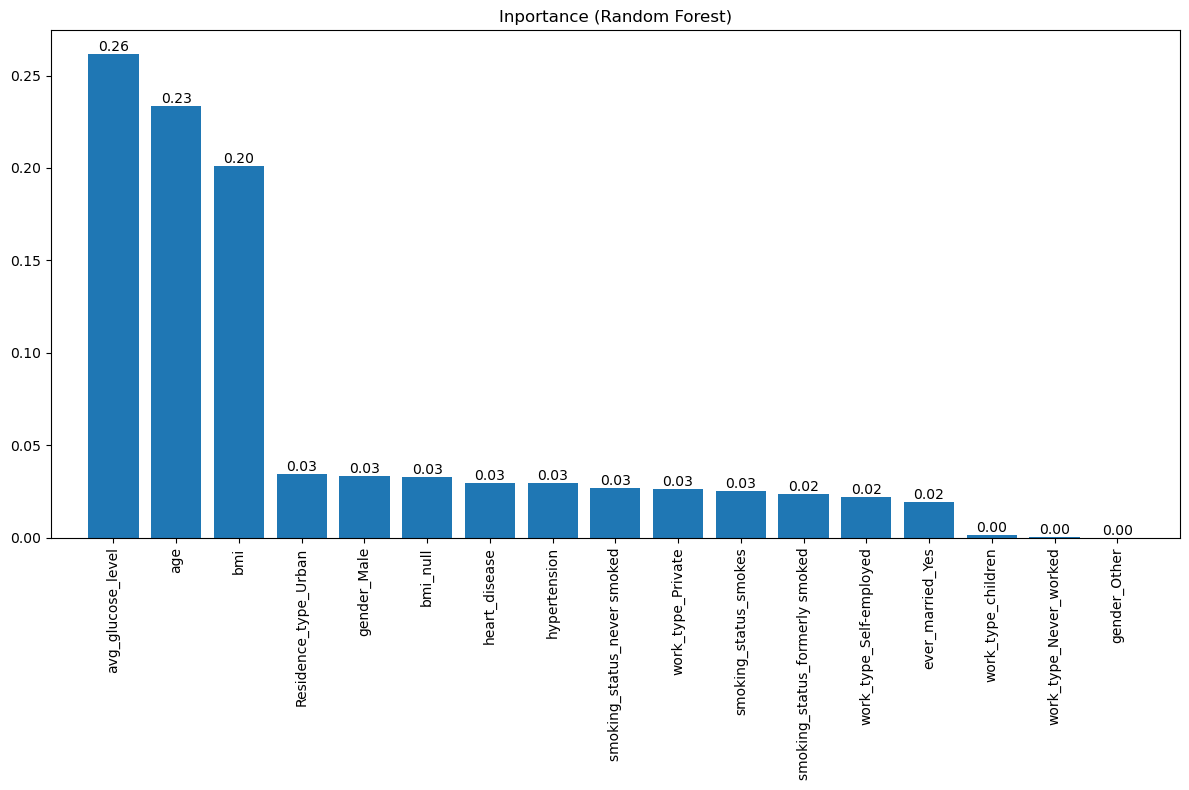

In [41]:

# 特徴量の重要度を取得
rf_importances = rf_model.feature_importances_
rf_indices = np.argsort(rf_importances)[::-1]

# 特徴量の重要度をプロット

plt.figure()
plt.figure(figsize=(12, 8))  # figsizeを設定

plt.title("Inportance (Random Forest)")
bars = plt.bar(range(X.shape[1]), rf_importances[rf_indices], align="center")
plt.xticks(range(X.shape[1]),X.columns[rf_indices], rotation=90)
plt.xlim([-1, X.shape[1]])
for bar, importance in zip(bars, rf_importances[rf_indices]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{importance:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


モデルに対する重要度は平均グルコース、年齢、bmiの順で高い  
（モデルに対する重要度であるため、具体的にどれくらい脳卒中のリスクが高まるかわからない）

In [42]:
dummied[dummied['stroke'] == 1].describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,bmi_null,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.0,230.000000,230.000000,230.0,230.000000,230.0,230.000000,230.000000,230.000000,230.000000,230.000000,230.00000,230.000000
mean,37259.556522,68.392696,0.256522,0.195652,128.778000,28.789246,1.0,0.173913,0.439130,0.0,0.878261,0.0,0.586957,0.269565,0.008696,0.530435,0.273913,0.36087,0.169565
std,22223.560310,12.675623,0.437666,0.397567,60.489256,4.279123,0.0,0.379861,0.497363,0.0,0.327697,0.0,0.493454,0.444702,0.093047,0.500161,0.446938,0.48130,0.376069
min,210.000000,1.320000,0.000000,0.000000,56.110000,16.900000,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,17415.750000,60.000000,0.000000,0.000000,78.802500,26.725000,1.0,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,36522.000000,72.000000,0.000000,0.000000,103.900000,27.500000,1.0,0.000000,0.000000,0.0,1.000000,0.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000
75%,56638.250000,78.000000,1.000000,0.000000,191.287500,31.400000,1.0,0.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,0.000000,1.000000,1.000000,1.00000,0.000000
max,72918.000000,82.000000,1.000000,1.000000,271.740000,39.300000,1.0,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [43]:
dummied[dummied['stroke'] == 0].describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,bmi_null,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,4466.000000,4466.000000,4466.000000,4466.000000,4466.000000,4466.000000,4466.0,4466.000000,4466.000000,4466.000000,4466.000000,4466.000000,4466.000000,4466.000000,4466.000000,4466.000000,4466.000000,4466.000000,4466.000000
mean,36424.677116,41.660923,0.082400,0.048813,103.468712,27.260802,0.0,0.036050,0.422750,0.000224,0.631214,0.004478,0.560681,0.154948,0.152933,0.504478,0.164801,0.366323,0.150694
std,21122.212465,22.798466,0.275004,0.215502,42.300407,5.812270,0.0,0.186436,0.494052,0.014964,0.482530,0.066777,0.496360,0.361896,0.359963,0.500036,0.371042,0.481853,0.357791
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17646.250000,23.000000,0.000000,0.000000,76.922500,23.200000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36915.500000,43.000000,0.000000,0.000000,91.080000,27.335662,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,54536.500000,60.000000,0.000000,0.000000,112.077500,31.400000,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,267.760000,39.900000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 具体的にどのような行動をとればよいかわからないため、説明できるよう違うモデルを試す。

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ロジスティック回帰モデル
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# 特徴量の係数を取得
coefficients = logreg.coef_[0]


Average Glucose Level Coefficient: 0.05400473022399881


In [45]:
feature_names = X.columns

# 平均グルコース値の係数を確認
glucose_index = feature_names.get_loc('avg_glucose_level')
glucose_coefficient = coefficients[glucose_index]
print(f"Average Glucose Level Coefficient: {glucose_coefficient}")


Average Glucose Level Coefficient: 0.05400473022399881


In [46]:
coefficients

array([ 1.7335967 ,  0.09443058,  0.11555756,  0.05400473,  0.07046669,
        0.29107913, -0.07930786, -0.03781197, -0.14605058, -0.08938712,
        0.06751139, -0.06351185,  0.42316919, -0.01834916,  0.04059967,
       -0.05717269,  0.08003337])

In [51]:
# 特徴量の名前を取得
feature_names = X.columns

# 特徴量の名前と係数をデータフレームに変換
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# データフレームを表示
coefficients_df


,Feature,Coefficient
0,age,1.733597
1,hypertension,0.094431
2,heart_disease,0.115558
3,avg_glucose_level,0.054005
4,bmi,0.070467
5,bmi_null,0.291079
6,gender_Male,-0.079308
7,gender_Other,-0.037812
8,ever_married_Yes,-0.146051
9,work_type_Never_worked,-0.089387


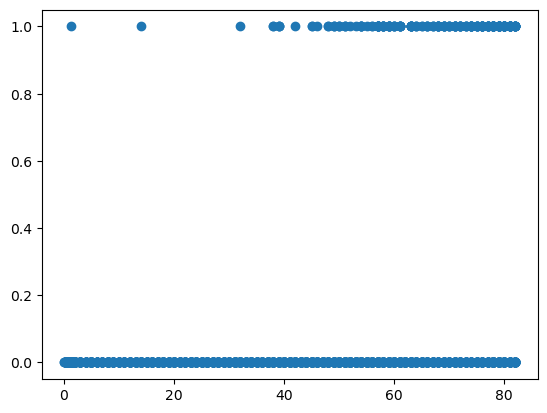

In [58]:
#年齢の影響が強く出ている（stroke=1は40以上がほとんど）
plt.scatter(dummied['age'], dummied['stroke'])

(array([ 1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  5.,  3.,  6.,  8.,
        18., 24., 13., 20., 21., 33., 76.]),
 array([ 1.32 ,  5.354,  9.388, 13.422, 17.456, 21.49 , 25.524, 29.558,
        33.592, 37.626, 41.66 , 45.694, 49.728, 53.762, 57.796, 61.83 ,
        65.864, 69.898, 73.932, 77.966, 82.   ]),
 <BarContainer object of 20 artists>)

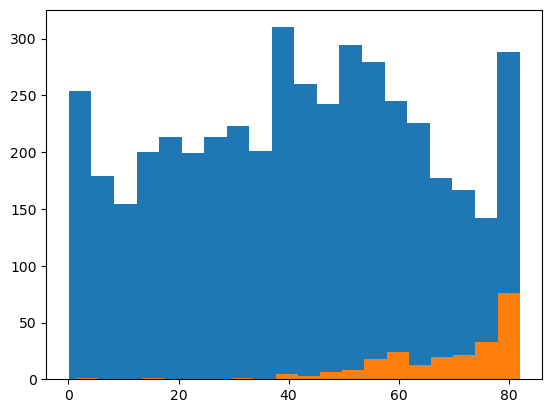

In [64]:
plt.hist(dummied[dummied['stroke']!=1]['age'], bins = 20)
plt.hist(dummied[dummied['stroke'] == 1]['age'], bins = 20)


(array([254., 179., 154., 200., 213., 199., 213., 223., 201., 310., 260.,
        242., 294., 279., 245., 226., 177., 167., 142., 288.]),
 array([8.0000e-02, 4.1760e+00, 8.2720e+00, 1.2368e+01, 1.6464e+01,
        2.0560e+01, 2.4656e+01, 2.8752e+01, 3.2848e+01, 3.6944e+01,
        4.1040e+01, 4.5136e+01, 4.9232e+01, 5.3328e+01, 5.7424e+01,
        6.1520e+01, 6.5616e+01, 6.9712e+01, 7.3808e+01, 7.7904e+01,
        8.2000e+01]),
 <BarContainer object of 20 artists>)

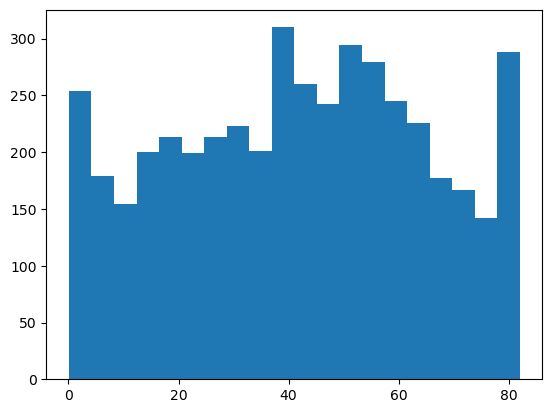

In [62]:
plt.hist(dummied[dummied['stroke']!=1]['age'], bins = 20)